In [39]:
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd
import datetime as dt
sns.set_style("darkgrid")
mpl.rcParams['figure.figsize']=(20,5)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#importing datasets

daily_activities=pd.read_csv(r'C:\Users\sakpal\Downloads\SMA\new\dailyActivity_merged.csv')
sleep_activity= pd.read_csv(r'C:\Users\sakpal\Downloads\SMA\new\sleepDay_merged.csv')

## Data Cleaning and Preparation

In [3]:
#Printing the information on the table to perform a sanity check
print(daily_activities.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [4]:
daily_activities.count()

Id                          940
ActivityDate                940
TotalSteps                  940
TotalDistance               940
TrackerDistance             940
LoggedActivitiesDistance    940
VeryActiveDistance          940
ModeratelyActiveDistance    940
LightActiveDistance         940
SedentaryActiveDistance     940
VeryActiveMinutes           940
FairlyActiveMinutes         940
LightlyActiveMinutes        940
SedentaryMinutes            940
Calories                    940
dtype: int64

In [5]:
daily_activities.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
935    False
936    False
937    False
938    False
939    False
Length: 940, dtype: bool

In [6]:
daily_activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [7]:
print(daily_activities.isnull().sum())

Id                          0
ActivityDate                0
TotalSteps                  0
TotalDistance               0
TrackerDistance             0
LoggedActivitiesDistance    0
VeryActiveDistance          0
ModeratelyActiveDistance    0
LightActiveDistance         0
SedentaryActiveDistance     0
VeryActiveMinutes           0
FairlyActiveMinutes         0
LightlyActiveMinutes        0
SedentaryMinutes            0
Calories                    0
dtype: int64


In [8]:
#Count how many unique entries
print(len(pd.unique(daily_activities["Id"])))

33


In [9]:
#Change datatype of the Activity Date column
daily_activities['ActivityDate']= pd.to_datetime(daily_activities['ActivityDate'])

#Print info on the dataframe again to check the ActivityDate Data type
daily_activities.info()
#daily_activities.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [10]:
sleep_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [11]:
sleep_activity.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,4.130000e+02,413.000000,413.000000,413.000000
mean,5.000979e+09,1.118644,419.467312,458.639225
std,2.060360e+09,0.345521,118.344679,127.101607
min,1.503960e+09,1.000000,58.000000,61.000000
25%,3.977334e+09,1.000000,361.000000,403.000000
50%,4.702922e+09,1.000000,433.000000,463.000000
75%,6.962181e+09,1.000000,490.000000,526.000000
max,8.792010e+09,3.000000,796.000000,961.000000


In [12]:
#Change datatype of the sleep Activity Date column
sleep_activity['SleepDay']= pd.to_datetime(sleep_activity['SleepDay'])

#Print info on the dataframe again to check the ActivityDate Data type
sleep_activity.info()
#daily_activities.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


## Create Calculated Columns

In [13]:
daily_activities['TotalMinutes']=daily_activities['VeryActiveMinutes']+daily_activities['FairlyActiveMinutes']+daily_activities['LightlyActiveMinutes']
daily_activities.head()

daily_activities['TotalDistance']=daily_activities['VeryActiveDistance']+daily_activities['LightActiveDistance']+daily_activities['SedentaryActiveDistance']
daily_activities.head()

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes
0,1503960366,2016-04-12,13162,7.94,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366
1,1503960366,2016-04-13,10735,6.28,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257
2,1503960366,2016-04-14,10460,6.35,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222
3,1503960366,2016-04-15,9762,4.97,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272
4,1503960366,2016-04-16,12669,7.75,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267


In [14]:
# convert minutes to hours
for index, row in daily_activities.iterrows():
    hours= row['TotalMinutes']//60
# Using modulus to convert the remainder to minutes
    minutes = row['TotalMinutes']%60  
    daily_activities.at[index, 'TotalActiveHours'] = '{}.{}'.format(hours, minutes)
    
    
daily_activities.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalActiveHours
0,1503960366,2016-04-12,13162,7.94,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,6.6
1,1503960366,2016-04-13,10735,6.28,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,4.17
2,1503960366,2016-04-14,10460,6.35,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,3.42
3,1503960366,2016-04-15,9762,4.97,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,4.32
4,1503960366,2016-04-16,12669,7.75,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,4.27
5,1503960366,2016-04-17,9705,5.70,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,222,3.42
6,1503960366,2016-04-18,13019,7.96,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,291,4.51
7,1503960366,2016-04-19,15506,8.56,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,345,5.45
8,1503960366,2016-04-20,10544,6.20,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,245,4.5
9,1503960366,2016-04-21,9819,5.99,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,238,3.58


## Next calculated column is the Activity Day which would display the day of the week the activities were recorded

In [15]:
# create new column for day of the week
daily_activities['ActivityDay'] = daily_activities['ActivityDate'].dt.day_name().astype(str)

# daily_activities.info()
daily_activities.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalActiveHours,ActivityDay
0,1503960366,2016-04-12,13162,7.94,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,6.6,Tuesday
1,1503960366,2016-04-13,10735,6.28,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,4.17,Wednesday
2,1503960366,2016-04-14,10460,6.35,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,3.42,Thursday
3,1503960366,2016-04-15,9762,4.97,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,4.32,Friday
4,1503960366,2016-04-16,12669,7.75,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,4.27,Saturday
5,1503960366,2016-04-17,9705,5.70,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,222,3.42,Sunday
6,1503960366,2016-04-18,13019,7.96,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,291,4.51,Monday
7,1503960366,2016-04-19,15506,8.56,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,345,5.45,Tuesday
8,1503960366,2016-04-20,10544,6.20,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,245,4.5,Wednesday
9,1503960366,2016-04-21,9819,5.99,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,238,3.58,Thursday


## Creating a dummy column to merge the two data sets.
This will be done by concatentating User ID and Date on both datasets

In [16]:
# Create a new column for merge
daily_activities['UserIDDate'] = daily_activities['Id'].astype(str) +' '+ daily_activities['ActivityDate'].astype(str)
daily_activities.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalActiveHours,ActivityDay,UserIDDate
0,1503960366,2016-04-12,13162,7.94,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,366,6.6,Tuesday,1503960366 2016-04-12
1,1503960366,2016-04-13,10735,6.28,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,257,4.17,Wednesday,1503960366 2016-04-13
2,1503960366,2016-04-14,10460,6.35,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,222,3.42,Thursday,1503960366 2016-04-14
3,1503960366,2016-04-15,9762,4.97,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,272,4.32,Friday,1503960366 2016-04-15
4,1503960366,2016-04-16,12669,7.75,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,267,4.27,Saturday,1503960366 2016-04-16
5,1503960366,2016-04-17,9705,5.70,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,222,3.42,Sunday,1503960366 2016-04-17
6,1503960366,2016-04-18,13019,7.96,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,291,4.51,Monday,1503960366 2016-04-18
7,1503960366,2016-04-19,15506,8.56,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,345,5.45,Tuesday,1503960366 2016-04-19
8,1503960366,2016-04-20,10544,6.20,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,245,4.5,Wednesday,1503960366 2016-04-20
9,1503960366,2016-04-21,9819,5.99,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,238,3.58,Thursday,1503960366 2016-04-21


In [17]:
# Create a new column for merge
sleep_activity['UserIDDate'] =sleep_activity['Id'].astype(str) +' '+ sleep_activity['SleepDay'].astype(str)
sleep_activity.head(10)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,UserIDDate
0,1503960366,2016-04-12,1,327,346,1503960366 2016-04-12
1,1503960366,2016-04-13,2,384,407,1503960366 2016-04-13
2,1503960366,2016-04-15,1,412,442,1503960366 2016-04-15
3,1503960366,2016-04-16,2,340,367,1503960366 2016-04-16
4,1503960366,2016-04-17,1,700,712,1503960366 2016-04-17
5,1503960366,2016-04-19,1,304,320,1503960366 2016-04-19
6,1503960366,2016-04-20,1,360,377,1503960366 2016-04-20
7,1503960366,2016-04-21,1,325,364,1503960366 2016-04-21
8,1503960366,2016-04-23,1,361,384,1503960366 2016-04-23
9,1503960366,2016-04-24,1,430,449,1503960366 2016-04-24


In [18]:
#merge data together
print(daily_activities.shape)
print(sleep_activity.shape)

(940, 19)
(413, 6)


In [19]:
activities=pd.merge(daily_activities,sleep_activity,on=['UserIDDate'])

In [20]:
activities.head()

,Id_x,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,Calories,TotalMinutes,TotalActiveHours,ActivityDay,UserIDDate,Id_y,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,2016-04-12,13162,7.94,8.50,0.0,1.88,0.55,6.06,0.0,...,1985,366,6.6,Tuesday,1503960366 2016-04-12,1503960366,2016-04-12,1,327,346
1,1503960366,2016-04-13,10735,6.28,6.97,0.0,1.57,0.69,4.71,0.0,...,1797,257,4.17,Wednesday,1503960366 2016-04-13,1503960366,2016-04-13,2,384,407
2,1503960366,2016-04-15,9762,4.97,6.28,0.0,2.14,1.26,2.83,0.0,...,1745,272,4.32,Friday,1503960366 2016-04-15,1503960366,2016-04-15,1,412,442
3,1503960366,2016-04-16,12669,7.75,8.16,0.0,2.71,0.41,5.04,0.0,...,1863,267,4.27,Saturday,1503960366 2016-04-16,1503960366,2016-04-16,2,340,367
4,1503960366,2016-04-17,9705,5.70,6.48,0.0,3.19,0.78,2.51,0.0,...,1728,222,3.42,Sunday,1503960366 2016-04-17,1503960366,2016-04-17,1,700,712


In [21]:
activities.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 413 entries, 0 to 412
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id_x                      413 non-null    int64         
 1   ActivityDate              413 non-null    datetime64[ns]
 2   TotalSteps                413 non-null    int64         
 3   TotalDistance             413 non-null    float64       
 4   TrackerDistance           413 non-null    float64       
 5   LoggedActivitiesDistance  413 non-null    float64       
 6   VeryActiveDistance        413 non-null    float64       
 7   ModeratelyActiveDistance  413 non-null    float64       
 8   LightActiveDistance       413 non-null    float64       
 9   SedentaryActiveDistance   413 non-null    float64       
 10  VeryActiveMinutes         413 non-null    int64         
 11  FairlyActiveMinutes       413 non-null    int64         
 12  LightlyActiveMinutes  

In [22]:
for index,row in activities.iterrows():
    hours=row['TotalMinutesAsleep']//60
    minutes=row['TotalMinutesAsleep']%60
    activities.at[index,'TotalHoursAsleep'] = '{}.{}'.format(hours,minutes)

In [27]:
for index,row in activities.iterrows():
    hours=row['TotalTimeInBed']//60
    minutes=row['TotalTimeInBed']%60
    activities.at[index,'TotalHoursInBed']='{}.{}'.format(hours,minutes)

In [29]:
activities=activities.drop(['TotalHoursInBed'], axis=1)

In [30]:
activities.head()

,Id_x,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalActiveHours,ActivityDay,UserIDDate,Id_y,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHousrsInBed
0,1503960366,2016-04-12,13162,7.94,8.50,0.0,1.88,0.55,6.06,0.0,...,6.6,Tuesday,1503960366 2016-04-12,1503960366,2016-04-12,1,327,346,5.27,5.46
1,1503960366,2016-04-13,10735,6.28,6.97,0.0,1.57,0.69,4.71,0.0,...,4.17,Wednesday,1503960366 2016-04-13,1503960366,2016-04-13,2,384,407,6.24,6.47
2,1503960366,2016-04-15,9762,4.97,6.28,0.0,2.14,1.26,2.83,0.0,...,4.32,Friday,1503960366 2016-04-15,1503960366,2016-04-15,1,412,442,6.52,7.22
3,1503960366,2016-04-16,12669,7.75,8.16,0.0,2.71,0.41,5.04,0.0,...,4.27,Saturday,1503960366 2016-04-16,1503960366,2016-04-16,2,340,367,5.40,6.7
4,1503960366,2016-04-17,9705,5.70,6.48,0.0,3.19,0.78,2.51,0.0,...,3.42,Sunday,1503960366 2016-04-17,1503960366,2016-04-17,1,700,712,11.40,11.52


In [31]:
activities['TotalActiveHours'] = activities.TotalActiveHours.astype(float)
activities['TotalHoursAsleep'] = activities.TotalHoursAsleep.astype(float)
activities['TotalHousrsInBed'] = activities.TotalHousrsInBed.astype(float)
activities.head()

,Id_x,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,...,TotalActiveHours,ActivityDay,UserIDDate,Id_y,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHousrsInBed
0,1503960366,2016-04-12,13162,7.94,8.50,0.0,1.88,0.55,6.06,0.0,...,6.60,Tuesday,1503960366 2016-04-12,1503960366,2016-04-12,1,327,346,5.27,5.46
1,1503960366,2016-04-13,10735,6.28,6.97,0.0,1.57,0.69,4.71,0.0,...,4.17,Wednesday,1503960366 2016-04-13,1503960366,2016-04-13,2,384,407,6.24,6.47
2,1503960366,2016-04-15,9762,4.97,6.28,0.0,2.14,1.26,2.83,0.0,...,4.32,Friday,1503960366 2016-04-15,1503960366,2016-04-15,1,412,442,6.52,7.22
3,1503960366,2016-04-16,12669,7.75,8.16,0.0,2.71,0.41,5.04,0.0,...,4.27,Saturday,1503960366 2016-04-16,1503960366,2016-04-16,2,340,367,5.40,6.70
4,1503960366,2016-04-17,9705,5.70,6.48,0.0,3.19,0.78,2.51,0.0,...,3.42,Sunday,1503960366 2016-04-17,1503960366,2016-04-17,1,700,712,11.40,11.52


## Exploratory Data Analysis

In [32]:
activities.describe()

,Id_x,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,...,SedentaryMinutes,Calories,TotalMinutes,TotalActiveHours,Id_y,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,TotalHoursAsleep,TotalHousrsInBed
count,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,413.000000,...,413.000000,413.000000,413.000000,413.000000,4.130000e+02,413.000000,413.000000,413.000000,413.000000,413.000000
mean,5.000979e+09,8541.140436,5.258402,6.033632,0.113142,1.450363,0.750242,3.807119,0.000920,25.188862,...,712.169492,2397.573850,260.082324,4.194262,5.000979e+09,1.118644,419.467312,458.639225,6.843850,7.557433
std,2.060360e+09,4156.926990,2.592315,3.047420,0.513107,1.994352,1.000183,1.734511,0.008653,36.388187,...,165.957432,762.886326,92.538672,1.546057,2.060360e+09,0.345521,118.344679,127.101607,1.988443,2.131522
min,1.503960e+09,17.000000,0.010000,0.010000,0.000000,0.000000,0.000000,0.010000,0.000000,0.000000,...,0.000000,257.000000,2.000000,0.170000,1.503960e+09,1.000000,58.000000,61.000000,0.580000,1.100000
25%,3.977334e+09,5206.000000,3.380000,3.600000,0.000000,0.000000,0.000000,2.540000,0.000000,0.000000,...,631.000000,1850.000000,208.000000,3.320000,3.977334e+09,1.000000,361.000000,403.000000,6.100000,6.470000
50%,4.702922e+09,8925.000000,5.330000,6.290000,0.000000,0.570000,0.420000,3.680000,0.000000,9.000000,...,717.000000,2220.000000,264.000000,4.260000,4.702922e+09,1.000000,433.000000,463.000000,7.200000,7.480000
75%,6.962181e+09,11393.000000,6.880000,8.020000,0.000000,2.370000,1.040000,4.930000,0.000000,38.000000,...,783.000000,2926.000000,316.000000,5.230000,6.962181e+09,1.000000,490.000000,526.000000,8.190000,8.530000
max,8.792010e+09,22770.000000,16.560000,17.540001,4.081692,12.540000,6.480000,9.480000,0.110000,210.000000,...,1265.000000,4900.000000,540.000000,9.000000,8.792010e+09,3.000000,796.000000,961.000000,13.160000,16.100000


### Activities

1. Next focus would be how users interact with the app generally

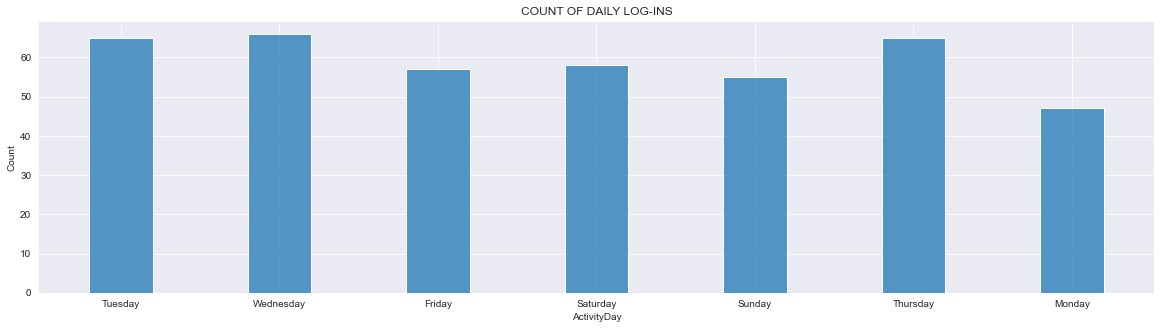

In [33]:
# Potting the day with the most log ins

sns.histplot(data=activities, x='ActivityDay', shrink = 0.4)
plt.title('COUNT OF DAILY LOG-INS')
plt.show()

Afterwards, using a pie chart to check the share of sedentary minutes, lightly active minutes, fairly active minutes and very active minutes

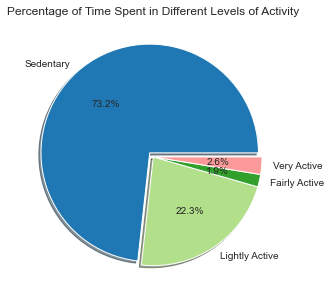

In [34]:
# Share of activities in each category

Sedentary = activities['SedentaryMinutes'].sum()
Lightly_Active = activities['LightlyActiveMinutes'].sum()
Fairly_Active = activities['FairlyActiveMinutes'].sum()
Very_Active = activities['VeryActiveMinutes'].sum()

# define the parameters
data = [Sedentary, Lightly_Active, Fairly_Active, Very_Active]
labels = ['Sedentary', 'Lightly Active', 'Fairly Active', 'Very Active']
colors = sns.color_palette("Paired")[1:5]
explode = (0.05, 0, 0, 0) 

#create chart
plt.pie(data, labels = labels, colors = colors, explode = explode, autopct='%1.1f%%', shadow =True)
plt.title("Percentage of Time Spent in Different Levels of Activity")
plt.show()

Using a bar chart the total active hours is plotted against the day of the week to see which days are the the most active days

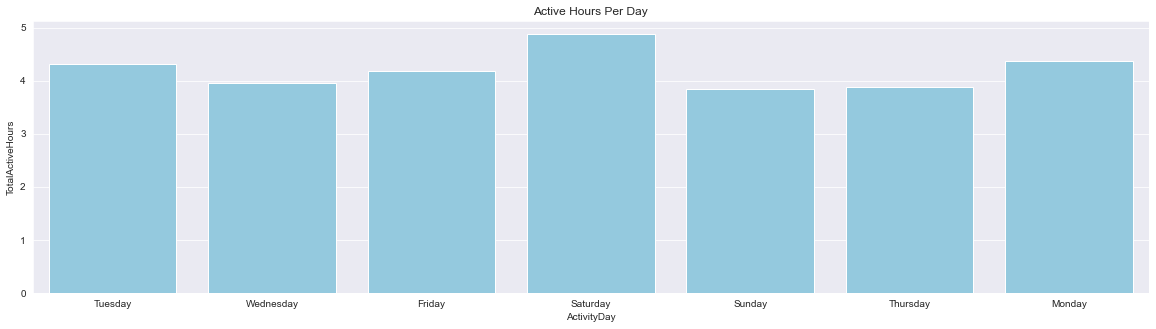

In [35]:
# Active hours per day
sns.barplot(data = activities, x = 'ActivityDay', y= 'TotalActiveHours', ci = None, color = 'skyblue')
plt.title('Active Hours Per Day')
plt.show()

## The next focus would be on sleep
1.Using a line chart, the average sleep hours per day is plotted

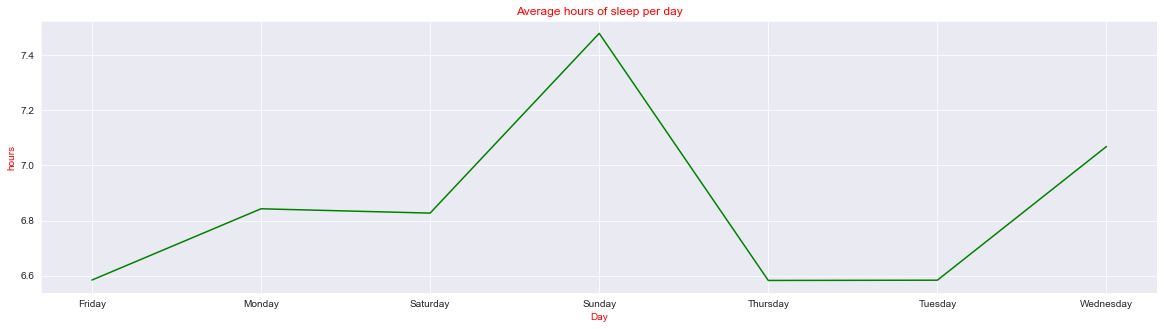

In [36]:
# Sleep per day

activities.groupby("ActivityDay")['TotalHoursAsleep'].mean().plot(kind = 'line',color='green')
plt.xlabel('Day', color='red')
plt.ylabel('hours', color='red')
plt.title('Average hours of sleep per day', color='red')
plt.show()

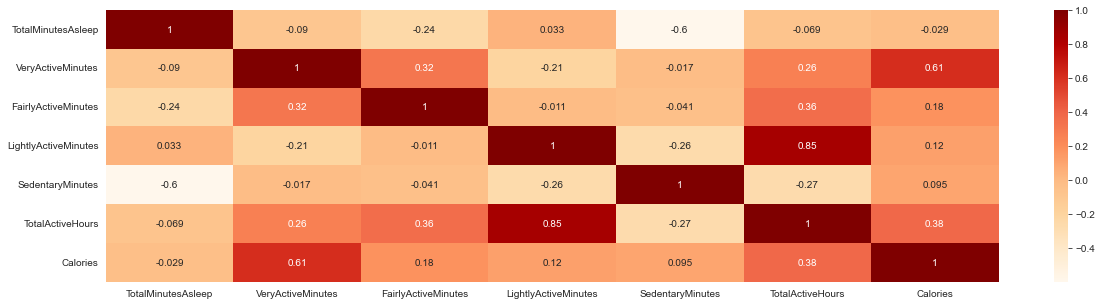

In [38]:
# Correlation of sleep and all Active Minutes and calories burned

columns = ['TotalMinutesAsleep', 'VeryActiveMinutes', 'FairlyActiveMinutes', 'LightlyActiveMinutes',
          'SedentaryMinutes', 'TotalActiveHours', 'Calories']

#Find correlation
correlation = activities[columns].corr()

# # creating heatmap
activities_heatmap = sns.heatmap(correlation, cmap='OrRd', annot=True)
plt.show()


Using scatter plots, the fitted line is plotted against sedentary minutes and total minutes asleep, Total minutes asleep and very active minutes, Total minutes asleep and fairly active minutes, Total minutes asleep and lightly active minutes

R-squared: 0.359273


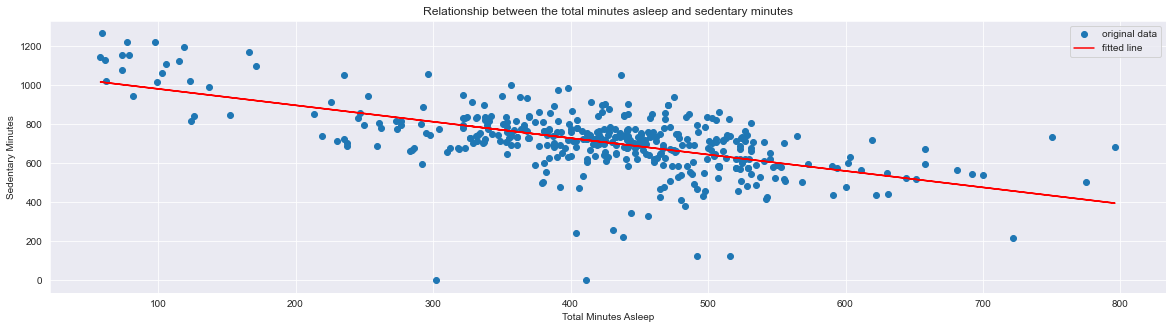

In [42]:
res=stats.linregress(activities['TotalMinutesAsleep'],activities['SedentaryMinutes'])
print(f"R-squared: {res.rvalue**2:.6f}")
plt.plot(activities['TotalMinutesAsleep'],activities['SedentaryMinutes'], 'o', label='original data')
plt.plot(activities['TotalMinutesAsleep'], res.intercept + res.slope*activities['TotalMinutesAsleep'], 'r', label='fitted line')
plt.legend()
plt.title('Relationship between the total minutes asleep and sedentary minutes')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('Sedentary Minutes')
plt.show()

R-squared: 0.008179


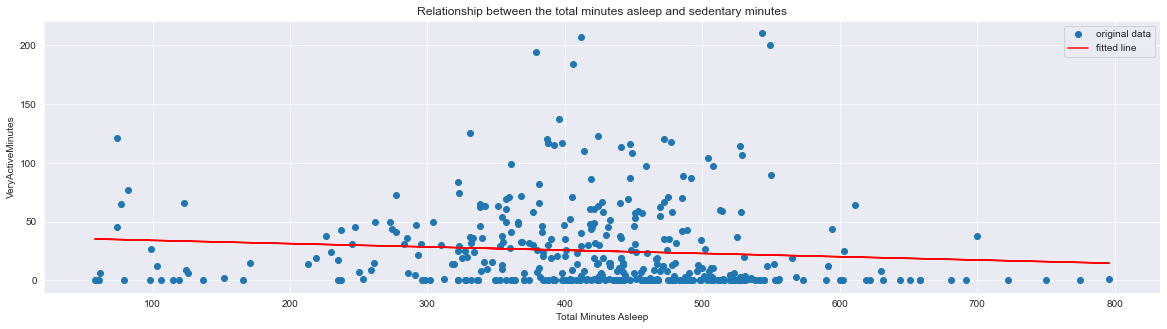

In [46]:
res1=stats.linregress(activities['TotalMinutesAsleep'],activities['VeryActiveMinutes'])
print(f"R-squared: {res1.rvalue**2:.6f}")
plt.plot(activities['TotalMinutesAsleep'],activities['VeryActiveMinutes'], 'o', label='original data')
plt.plot(activities['TotalMinutesAsleep'], res1.intercept + res1.slope*activities['TotalMinutesAsleep'], 'r', label='fitted line')
plt.legend()
plt.title('Relationship between the total minutes asleep and sedentary minutes')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('VeryActiveMinutes')
plt.show()

R-squared: 0.059797


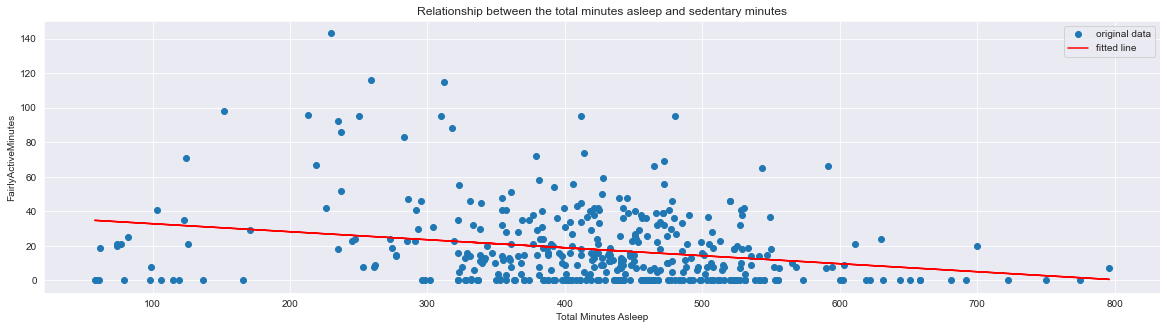

In [47]:
res2=stats.linregress(activities['TotalMinutesAsleep'],activities['FairlyActiveMinutes'])
print(f"R-squared: {res2.rvalue**2:.6f}")
plt.plot(activities['TotalMinutesAsleep'],activities['FairlyActiveMinutes'], 'o', label='original data')
plt.plot(activities['TotalMinutesAsleep'], res2.intercept + res2.slope*activities['TotalMinutesAsleep'], 'r', label='fitted line')
plt.legend()
plt.title('Relationship between the total minutes asleep and sedentary minutes')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('FairlyActiveMinutes')
plt.show()

R-squared: 0.001083


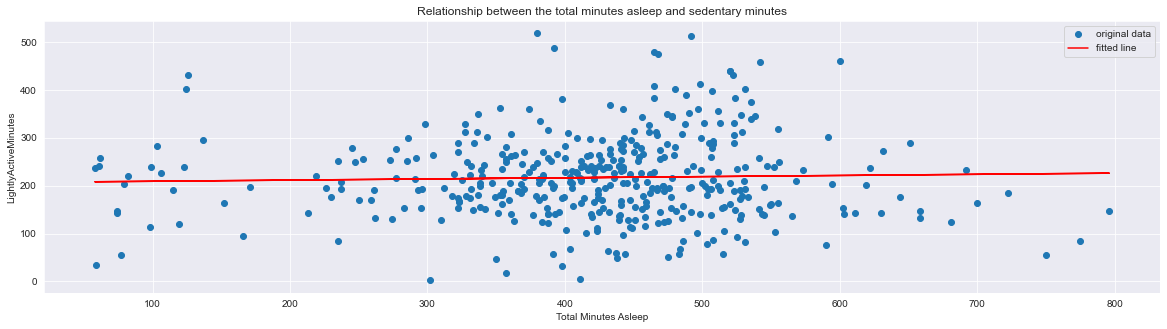

In [45]:
res3=stats.linregress(activities['TotalMinutesAsleep'],activities['LightlyActiveMinutes'])
print(f"R-squared: {res3.rvalue**2:.6f}")
plt.plot(activities['TotalMinutesAsleep'],activities['LightlyActiveMinutes'], 'o', label='original data')
plt.plot(activities['TotalMinutesAsleep'], res3.intercept + res3.slope*activities['TotalMinutesAsleep'], 'r', label='fitted line')
plt.legend()
plt.title('Relationship between the total minutes asleep and sedentary minutes')
plt.xlabel('Total Minutes Asleep')
plt.ylabel('LightlyActiveMinutes')
plt.show()

## INSIGHTS

1.On average, the users who participated in this study take 8541 steps in a day or walk a distance of 6.04km a day.

2.The users on average start logging their activities from the middle of the week, with Monday being the least logged in

3.73.2% of activities recorded are sedentary

4.Most active days are Mondays, Tuesdays and Fridays

5.On average, the users sleep for about 6.84hours with Sunday beign the most day users slept(7.5hours)

6.The strongest correlation was between Total active minutes and sedentary minutes (0.85) and calories burned with very active minutes(0.61)

7.The strongest relationship was between sedentary minutes and total minutes asleep with an R-squared: 0.359273